In [1]:
#Shishir Khanal
#July 4, 2025
#Correlation and Partial Autocorrelation Functions
import numpy as np
import pandas as pd
%matplotlib inline

In [33]:
# Compare data with itself laged or shifted by certain time steps
#eg; if you find Autocorrelation of a daily sales data shifted by n=1 time steps, it answers:
# How correlated are today's sales from yesterdays sales? => this gives me a number
# Create a plot of (n,A) 
#Peak and valley in this plot indicate seasonality
# Sharp cutoff indicates add AR terms in the model

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [34]:
#Non Stationary
df_ns = pd.read_csv('airline_passengers.csv',index_col='Month')
df_ns.dropna(inplace=True)
df_ns.index = pd.to_datetime(df_ns.index)
df_ns.index.freq = 'MS'

In [9]:
#Stationary Data
df_s = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df_s.index.freq='D'

In [10]:
df_ns.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df_s.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [14]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [15]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [16]:
pacf_yw(df['a'],nlags=4,method='mle')#maximum likelihood estimation

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [17]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [19]:
from pandas.plotting import lag_plot

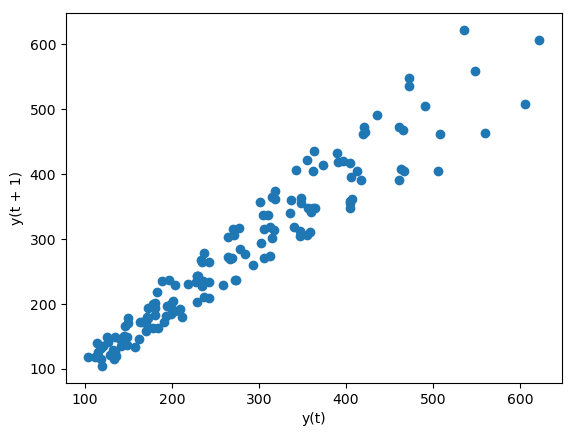

In [23]:
lag_plot(df_ns['Thousands of Passengers'])
#Indicate seasonality

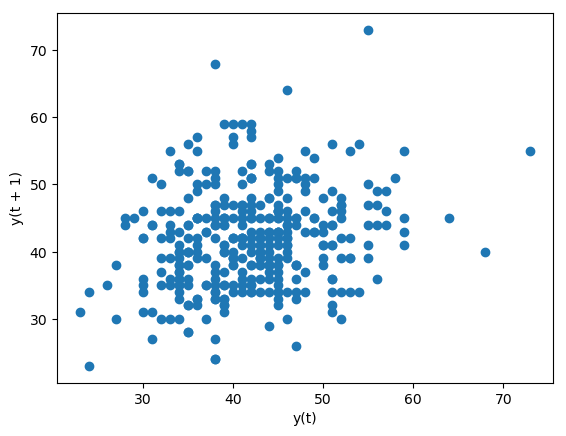

In [25]:
lag_plot(df_s['Births'])
#No Seasonality from births between days

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

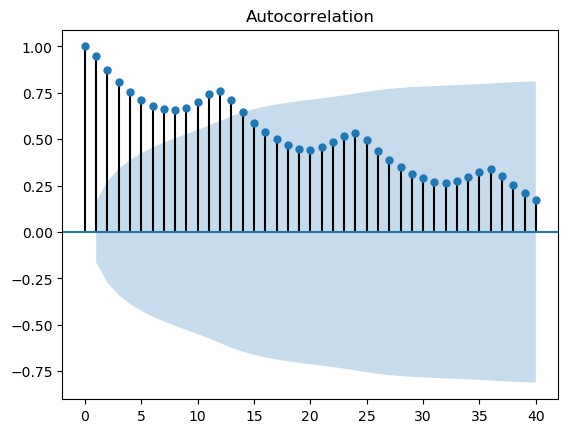

In [28]:
plot_acf(df_ns, lags=40); # shaded regions indicate 95% confidence

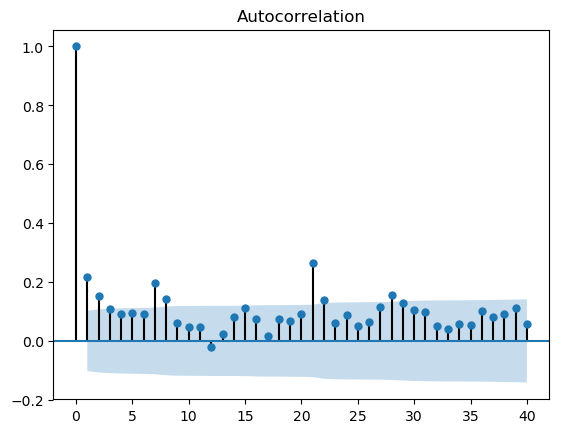

In [30]:
plot_acf(df_s,lags=40);

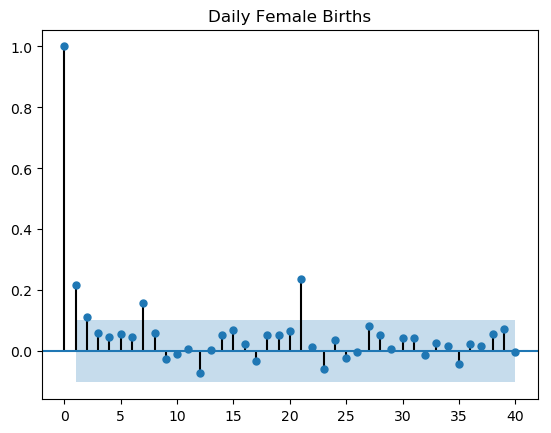

In [32]:
#Partial autocorrelation works best with stationary dataset
plot_pacf(df_s,lags=40,title='Daily Female Births');